# Asnaf Classification & Priority List

## Import Data

In [267]:
# import library
import pandas as pd
import numpy as np

In [268]:
df = pd.read_csv("train_data_synthetic.csv")

In [269]:
df.head(2)

,Dokumen Lampiran Utama,Kategori pemohon,Sebab Memohon Bantuan,No. K/P (baru)/Polis/Tentera/No. Pasport,Nama Pemohon/Institusi,Alamat,Daerah,Poskod,Bandar,Negeri,...,Sumber Pendapatan Bulanan,Perbelanjaan Bulanan,Hubungan kekeluargaan dengan kakitangan LZS?,Nama Kakitangan,Pejabat (Kakitangan Berhubungan),Hubungan,Jawatan (Kakitangan Berhubungan),Tarikh,asnaf_label,label_eligibility
0,"Sijil Nikah/Cerai/Mati, Salinan KP Pemohon, Pe...",Individu,Tiada pendapatan,820304-35-3395,Chua bin Jia Hao,"No. 18, Jalan Kenanga 7, Taman Rakyat, 47304 A...",Kuala Langat,47304,Ampang Jaya,Selangor,...,"{""Diri"": 1402.1, ""Isteri/Suami/Ibu Bapa/Penjag...","{""Perbelanjaan Makan Minum"": 690.06, ""Sewa/Ans...",TIDAK,NaN,NaN,NaN,NaN,2/10/2025,FAKIR,NOT ELIGIBLE
1,"Salinan KP Pemohon, Salinan KP Tanggungan, Pen...",Individu,Makan minum,020219-28-5402,Azizah binti Abdullah,"No. 150, Jalan Anggerik 10, Taman Indah, 47304...",Sabak Bernam,47304,Shah Alam,Selangor,...,"{""Diri"": 1569.91, ""Isteri/Suami/Ibu Bapa/Penja...","{""Perbelanjaan Makan Minum"": 1237.97, ""Sewa/An...",TIDAK,NaN,NaN,NaN,NaN,3/1/2025,FAKIR,NOT ELIGIBLE


## Data Overview

In [270]:
df.dtypes

Dokumen Lampiran Utama                           object
Kategori pemohon                                 object
Sebab Memohon Bantuan                            object
No. K/P (baru)/Polis/Tentera/No. Pasport         object
Nama Pemohon/Institusi                           object
Alamat                                           object
Daerah                                           object
Poskod                                            int64
Bandar                                           object
Negeri                                           object
Kariah                                           object
Warganegara                                      object
Tarikh Lahir                                     object
Emel                                             object
No. Telefon Bimbit                               object
No. Telefon Rumah/Waris                          object
Nama waris                                       object
Tempoh Menetap di Selangor                      

In [271]:
df.isnull().sum()

Dokumen Lampiran Utama                              0
Kategori pemohon                                    0
Sebab Memohon Bantuan                               0
No. K/P (baru)/Polis/Tentera/No. Pasport            0
Nama Pemohon/Institusi                              0
Alamat                                              0
Daerah                                              0
Poskod                                              0
Bandar                                              0
Negeri                                              0
Kariah                                              0
Warganegara                                         0
Tarikh Lahir                                        0
Emel                                                0
No. Telefon Bimbit                                  0
No. Telefon Rumah/Waris                          4431
Nama waris                                       4431
Tempoh Menetap di Selangor                          0
Jantina                     

Count of target variable

In [272]:
print(df['asnaf_label'].value_counts())

asnaf_label
FAKIR           10232
FISABILILLAH     1672
GHARIM           1667
MUALAF            796
IBNU SABIL        430
RIQAB             203
Name: count, dtype: int64


## Data Visualization

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualise the data
numerical_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(include=['object', 'category'])

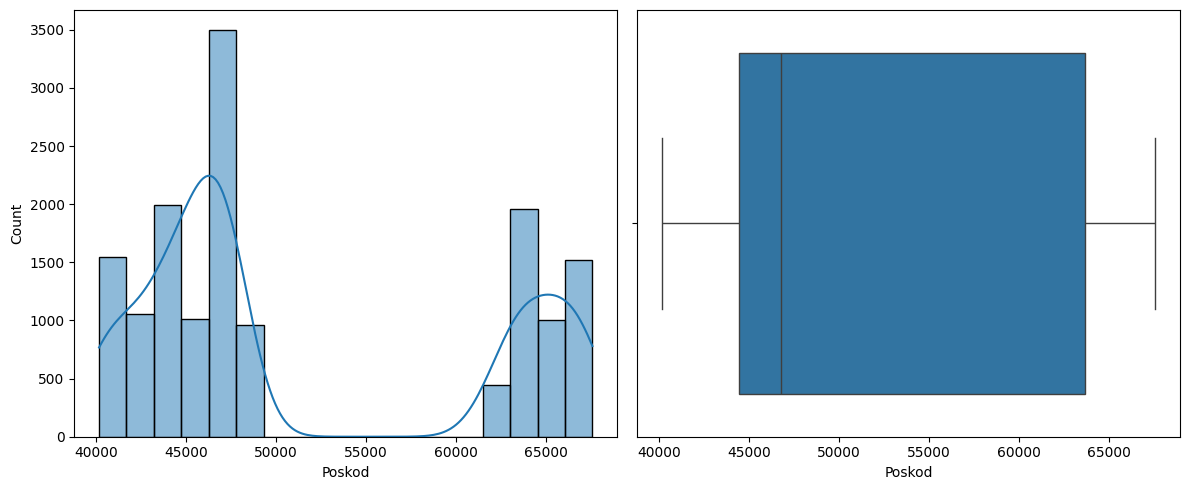

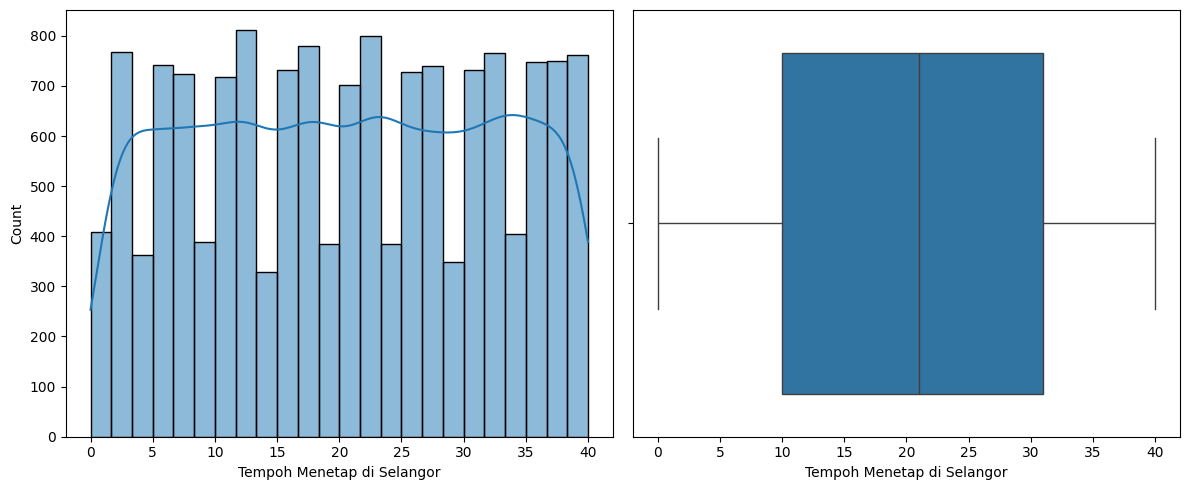

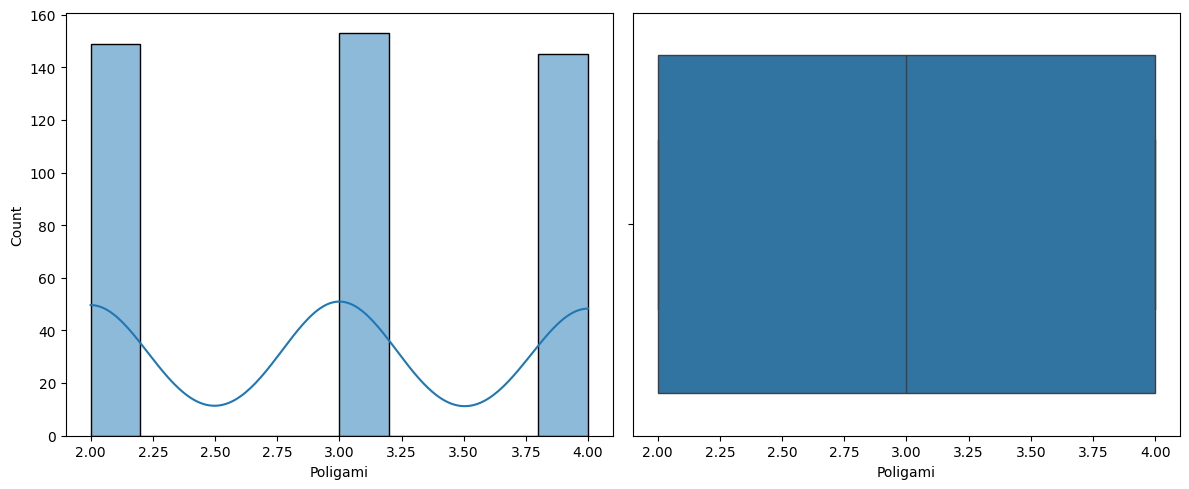

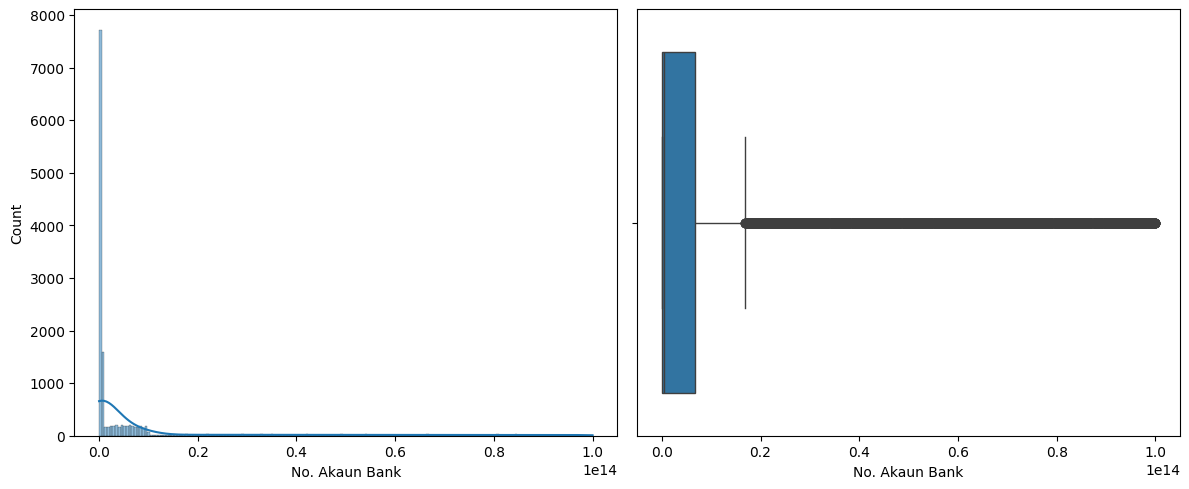

In [274]:
for feature in numerical_data:
    fig, axes = plt.subplots(1,2, figsize = (12, 5))
    sns.histplot(data=df, x=feature, kde=True, ax=axes[0])
    sns.boxplot(data=df, x=feature, ax=axes[1])

    plt.tight_layout()
    plt.show()

## Preprocessing

In [275]:
# Drop out the asnaf label and the unrelevant label
target = df["asnaf_label"]
df = df.drop("asnaf_label", axis=1)

df = df.drop("label_eligibility", axis=1)

In [276]:
# List of documents to flag
DOCUMENT_LIST = [
    "Salinan KP Pemohon", "Salinan KP Pasangan", "Salinan KP Tanggungan",
    "Kad Islam", "Penyata Bank", "Sijil Nikah/Cerai/Mati",
    "Slip Gaji", "Kad OKU", "Bil Utiliti", "Penyata KWSP",
    "Sokongan Tambahan"
]

# Function to flag presence of documents
def flag_documents(dokumen_string):
    flags = {doc: (doc in dokumen_string) for doc in DOCUMENT_LIST}
    return pd.Series(flags)

# Apply the function and create new columns
df_flags = df["Dokumen Lampiran Utama"].apply(flag_documents)

# Concatenate the original DataFrame with the flags DataFrame
df = pd.concat([df, df_flags], axis=1)

In [277]:
# Dropping out the flagged column
df = df.drop(columns=["Dokumen Lampiran Utama"])

Flattening the json format data

In [278]:
import json
# Step 1: Convert JSON-like strings to dictionaries
df["Sumber Pendapatan Bulanan"] = df["Sumber Pendapatan Bulanan"].apply(json.loads)

# Step 2: Normalize the data into a DataFrame
income_df = pd.json_normalize(df["Sumber Pendapatan Bulanan"])

# Step 3: Prepend "Sumber Pendapatan " to each column name
income_df.columns = [f"Sumber Pendapatan {col}" for col in income_df.columns]

# Step 4: Concatenate with the original DataFrame
df = pd.concat([df.drop(columns=["Sumber Pendapatan Bulanan"]), income_df], axis=1)

In [279]:
# Step 1: Convert JSON-like strings to dictionaries
df["Perbelanjaan Bulanan"] = df["Perbelanjaan Bulanan"].apply(json.loads)

# Step 2: Normalize the data into a DataFrame
expenses_df = pd.json_normalize(df["Perbelanjaan Bulanan"])

# Step 3: Prepend "Perbelanjaan " to each column name
expenses_df.columns = [f"Perbelanjaan {col}" for col in expenses_df.columns]

# Step 4: Concatenate with the original DataFrame
df = pd.concat([df.drop(columns=["Perbelanjaan Bulanan"]), expenses_df], axis=1)

Converting date of birth to age

In [280]:
# Step 1: Convert the column to datetime
df['Tarikh'] = pd.to_datetime(df['Tarikh'])
df['Tarikh Lahir'] = pd.to_datetime(df['Tarikh Lahir'])

# Step 2: Calculate age
df['Umur'] = (df['Tarikh'] - df['Tarikh Lahir']).dt.days // 365

Converting Tarikh Masuk Islam to days

In [281]:
# Step 1: Convert the column to datetime
df['Tarikh'] = pd.to_datetime(df['Tarikh'])
df['Tarikh Masuk Islam'] = pd.to_datetime(df['Tarikh Masuk Islam'])

# Step 2: Calculate age
df['Umur'] = (df['Tarikh'] - df['Tarikh Masuk Islam']).dt.days

In [282]:
df = df.drop("Tarikh Lahir", axis=1)
df = df.drop("Tarikh Masuk Islam", axis=1)

Flag features that might be noise but might having meanings for their existence

In [283]:
# potential noisy feature to flag
noisy_features = [
    'No. K/P (baru)/Polis/Tentera/No. Pasport',
    'Nama Pemohon/Institusi',
    'Alamat',
    'Emel',
    'No. Telefon Bimbit',
    'No. Telefon Rumah/Waris',
    'Nama waris',
    'Nama Pemegang Akaun',
    'No. Akaun Bank',
    'Nama Si Mati',
    'No. Kad Pengenalan Si Mati',
    'Nama Majikan',
    'No. Tel. Majikan',
    'Nama Kakitangan',
    'Jawatan (Kakitangan Berhubungan)',
    'Tarikh'
]

for feature in noisy_features:
    flagname = f"{feature}_flag"
    df[flagname] = df[feature].notnull().astype(int)
    df = df.drop(feature, axis=1)

In [284]:
df.columns

Index(['Kategori pemohon', 'Sebab Memohon Bantuan', 'Daerah', 'Poskod',
       'Bandar', 'Negeri', 'Kariah', 'Warganegara',
       'Tempoh Menetap di Selangor', 'Jantina', 'Kesihatan', 'Status',
       'Poligami', 'Bank', 'Cara Pembayaran', 'Sebab Pembayaran Tunai',
       'Maklumat Isi Rumah', 'Pekerjaan', 'Jawatan', 'Sebab Tidak Bekerja',
       'Sektor', 'Jenis Kerja Sendiri',
       'Hubungan kekeluargaan dengan kakitangan LZS?',
       'Pejabat (Kakitangan Berhubungan)', 'Hubungan', 'Salinan KP Pemohon',
       'Salinan KP Pasangan', 'Salinan KP Tanggungan', 'Kad Islam',
       'Penyata Bank', 'Sijil Nikah/Cerai/Mati', 'Slip Gaji', 'Kad OKU',
       'Bil Utiliti', 'Penyata KWSP', 'Sokongan Tambahan',
       'Sumber Pendapatan Diri',
       'Sumber Pendapatan Isteri/Suami/Ibu Bapa/Penjaga',
       'Sumber Pendapatan Pencen/PERKESO',
       'Sumber Pendapatan Sumbangan Anak-anak',
       'Sumber Pendapatan Lain-Lain (JKM dan Sebagainya)',
       'Sumber Pendapatan Lain-Lain Pendapat

Using one-hot encoding to handle "Sebab Memohon Bantuan", "Kategori pemohon" and "Sebab Tidak Bekerja"

In [285]:
df['Sebab Memohon Bantuan'].value_counts()

Sebab Memohon Bantuan
Bantuan kewangan                 776
Ringankan beban                  750
Tampung perbelanjaan             747
Makan minum                      746
Keperluan asas                   744
                                ... 
Tambang pulang (mualaf)            1
Aktiviti dakwah (mualaf)           1
Keperluan pelajar (mualaf)         1
Tiada pendapatan (mualaf)          1
Bayar bil tertunggak (mualaf)      1
Name: count, Length: 73, dtype: int64

In [286]:
df['Kategori pemohon'].value_counts()

Kategori pemohon
Individu     13136
Pelajar       1208
Institusi      656
Name: count, dtype: int64

In [287]:
df['Sebab Tidak Bekerja'].value_counts()

Sebab Tidak Bekerja
Menjaga Ahli Keluarga Sakit    1146
Belum Dapat Kerja              1136
Suri Rumah                     1129
Sakit/Cacat                    1115
Sudah Tua/Pencen               1115
Belajar                        1104
Name: count, dtype: int64

In [288]:
df = pd.concat([df, pd.get_dummies(df['Sebab Memohon Bantuan'], prefix='Sebab_Memohon_Bantuan')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Kategori pemohon'], prefix='Kategori_pemohon')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Sebab Tidak Bekerja'], prefix='Sebab Tidak Bekerja')], axis=1)

df = df.drop("Sebab Memohon Bantuan", axis=1)
df = df.drop("Kategori pemohon", axis=1)
df = df.drop("Sebab Tidak Bekerja", axis=1)

Encoding other categorical data

In [289]:
numerical_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(include=['object', 'category']).columns

In [290]:
# Encoding categorical data
from sklearn.preprocessing import OrdinalEncoder

# OrdinalEncoder cannot handle null
df[categorical_data] = df[categorical_data].fillna("missing").astype(str)

# Step 2: Encode
encoder = OrdinalEncoder()
df[categorical_data] = encoder.fit_transform(df[categorical_data])

Converting target to numerical representation

In [291]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

target = label_encoder.fit_transform(target)
print(dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_)))

{0: 'FAKIR', 1: 'FISABILILLAH', 2: 'GHARIM', 3: 'IBNU SABIL', 4: 'MUALAF', 5: 'RIQAB'}


In [292]:
# Storing the labelling information
class_map = dict(enumerate(label_encoder.classes_))

In [293]:
df.columns

Index(['Daerah', 'Poskod', 'Bandar', 'Negeri', 'Kariah', 'Warganegara',
       'Tempoh Menetap di Selangor', 'Jantina', 'Kesihatan', 'Status',
       ...
       'Sebab_Memohon_Bantuan_Yuran pengajian ipt (mualaf)',
       'Kategori_pemohon_Individu', 'Kategori_pemohon_Institusi',
       'Kategori_pemohon_Pelajar', 'Sebab Tidak Bekerja_Belajar',
       'Sebab Tidak Bekerja_Belum Dapat Kerja',
       'Sebab Tidak Bekerja_Menjaga Ahli Keluarga Sakit',
       'Sebab Tidak Bekerja_Sakit/Cacat',
       'Sebab Tidak Bekerja_Sudah Tua/Pencen',
       'Sebab Tidak Bekerja_Suri Rumah'],
      dtype='object', length=146)

Additional preprocessing to solve error for lgbm model

In [294]:
# seems like lgbm does not support JSON character for column name
df.columns = df.columns.str.replace(r'[^\w\s]', '_', regex=True)

## Model Training

In [295]:
# Base Modeling
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [296]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42, stratify=target)

# Prepare LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'multiclass',
    'num_class': 7,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.04,
    'feature_fraction': 0.2,
    'early_stopping_rounds': 10
}

# Train model
num_round = 100
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_label = y_pred.argmax(axis=1)  # Get the class with the highest probability

# Evaluate accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_label))  # Use y_pred_label, not y_pred
print("Classification Report:\n", classification_report(y_test, y_pred_label))  # Use y_pred_label


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4406
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 107
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -0.382446
[LightGBM] [Info] Start training from score -2.194372
[LightGBM] [Info] Start training from score -2.196939
[LightGBM] [Info] Start training from score -3.552020
[LightGBM] [Info] Start training from score -2.936565
[LightGBM] [Info] Start training from score -4.303303
[LightGBM] [Info] Start training from score -34.538776
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is

## Model Explanation

Using LightGMB built-in importance explainer

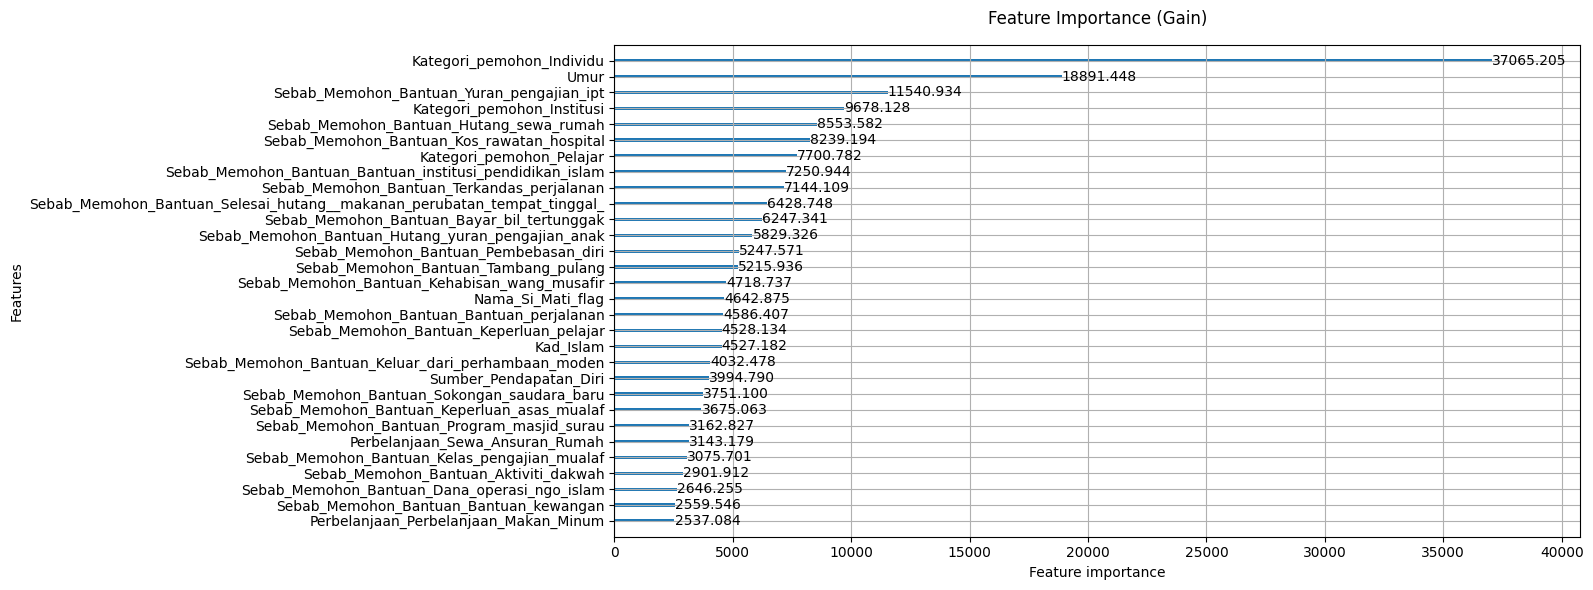

In [297]:
# ChatGPT Generated
# Plot feature importance
import matplotlib.pyplot as plt

lgb.plot_importance(lgb_model, max_num_features=30, importance_type='gain', figsize=(16, 6))
plt.title('Feature Importance (Gain)', pad=15)
plt.tight_layout()
plt.show()

Using shap to show the importance of each features

In [311]:
# ChatGPT generated code
import shap
import matplotlib.pyplot as plt

# Step 1: Create the SHAP explainer
explainer = shap.TreeExplainer(lgb_model)

# Step 2: Calculate SHAP values for the test set
shap_values = explainer(X_test)




Top Features for Class FAKIR


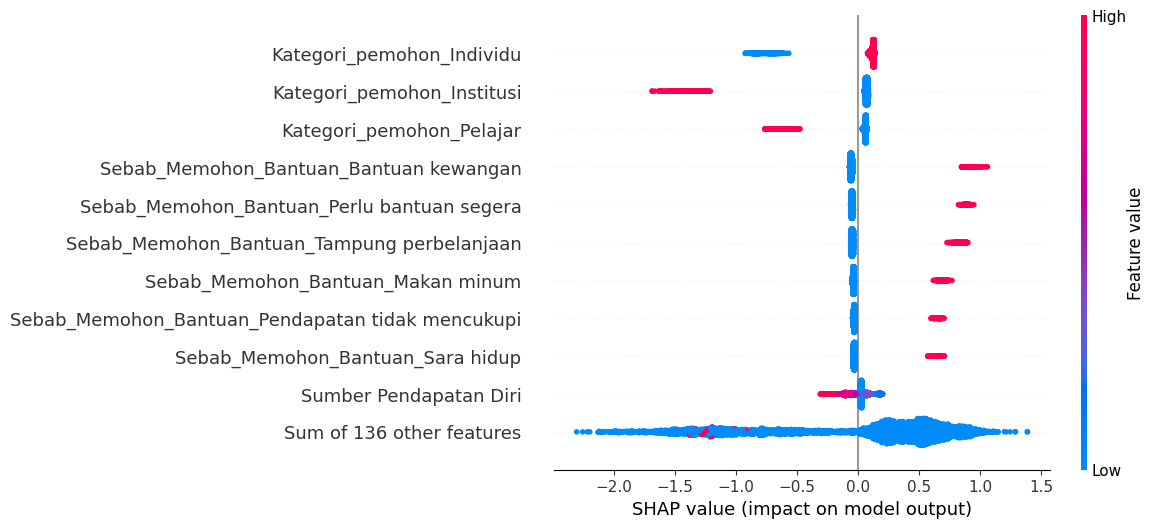


Top Features for Class FISABILILLAH


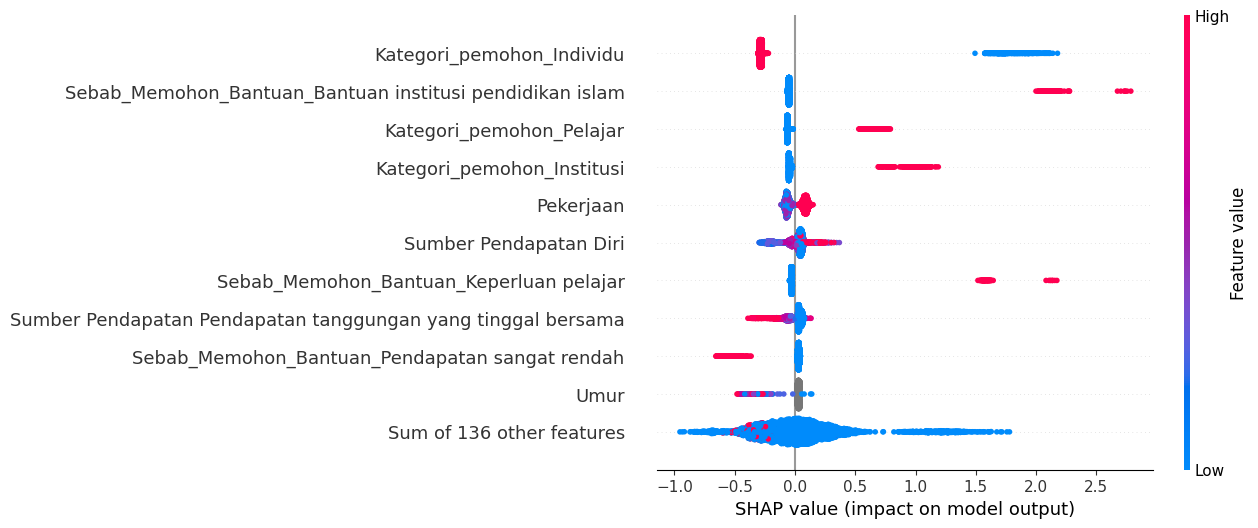


Top Features for Class GHARIM


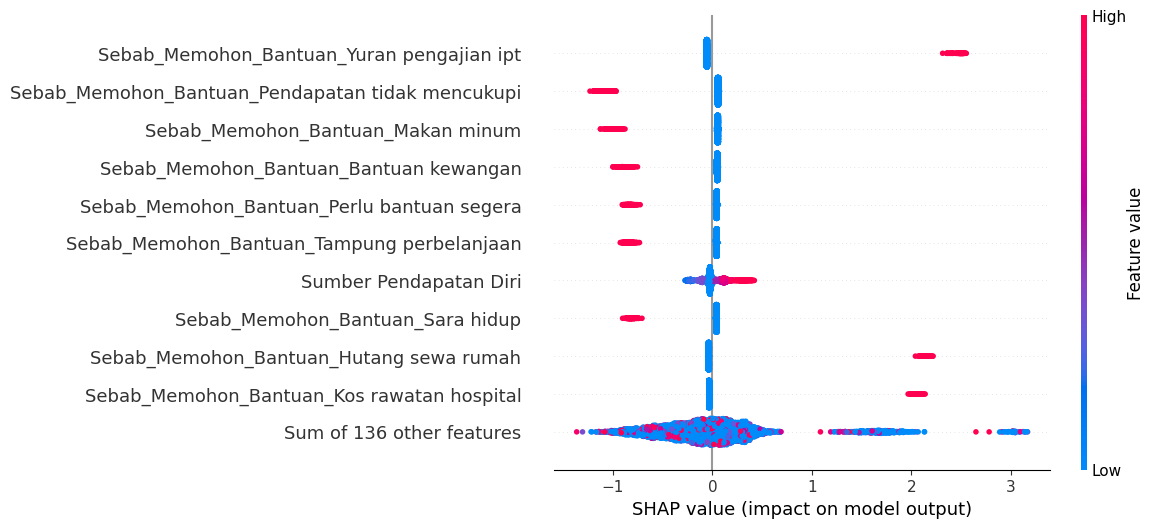


Top Features for Class IBNU SABIL


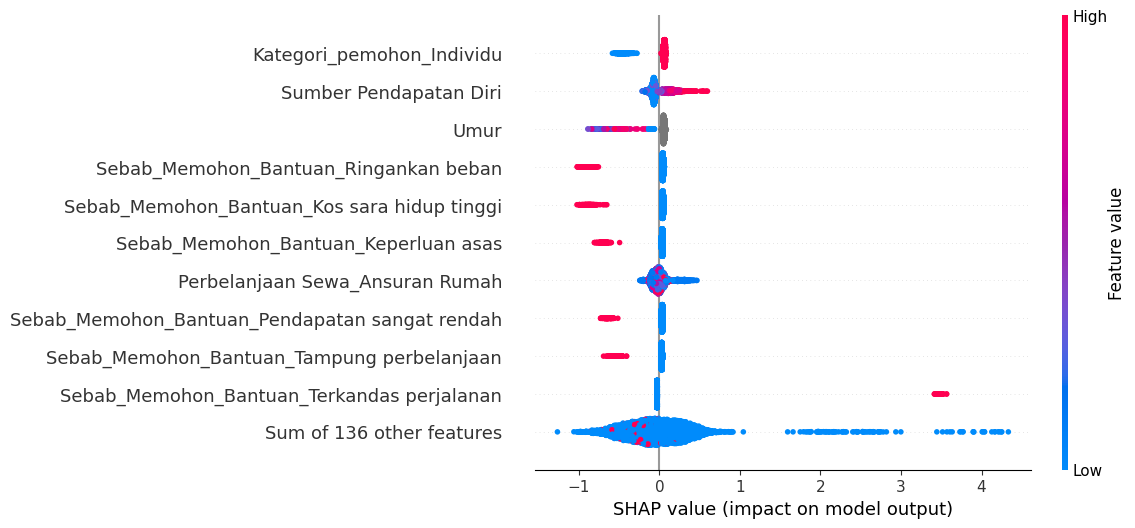


Top Features for Class MUALAF


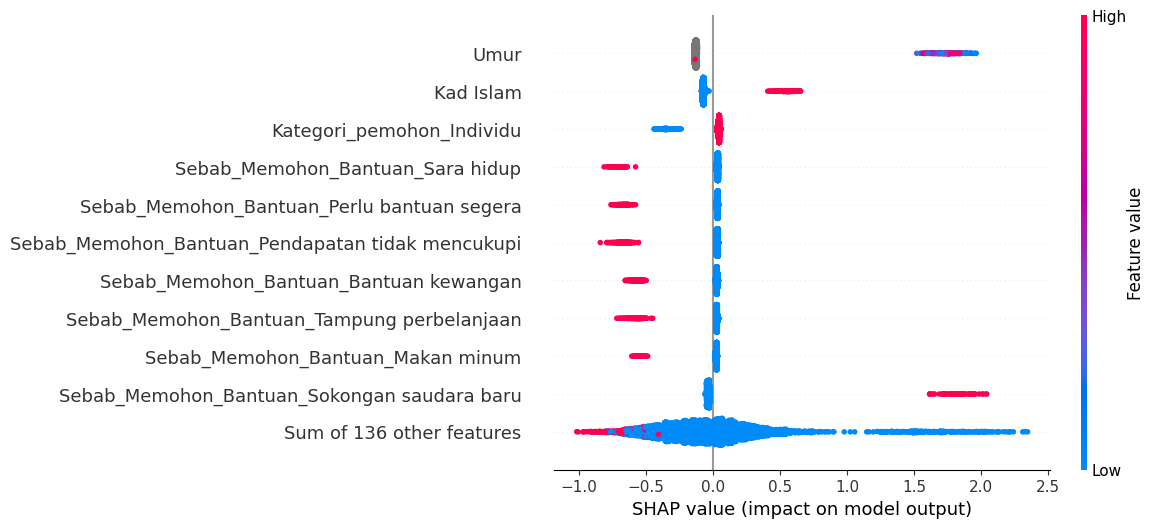


Top Features for Class RIQAB


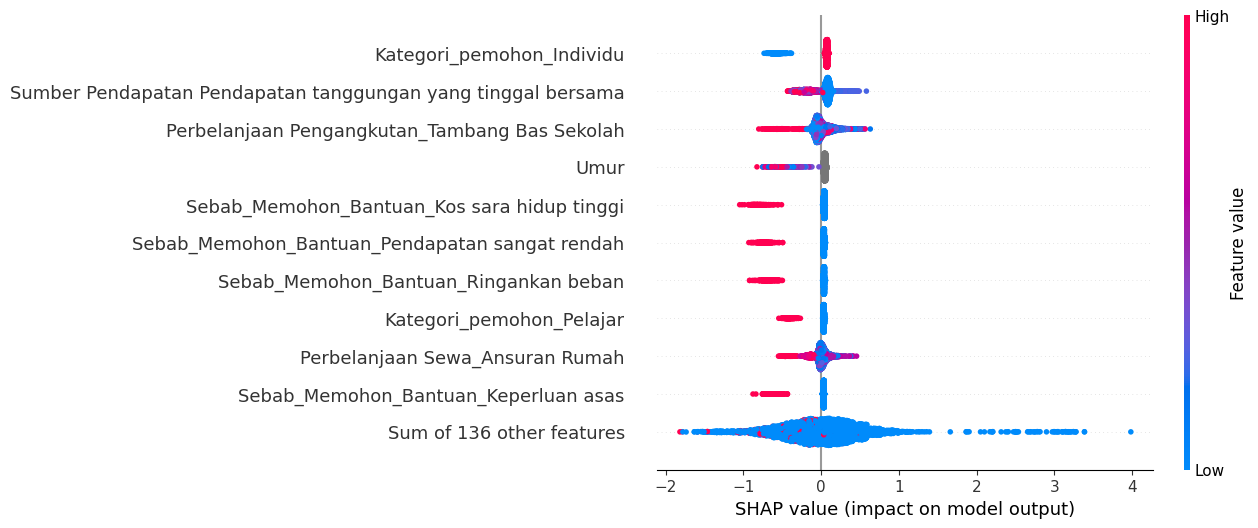

In [ ]:
last_key, last_value = list(class_map.items())[-1]

# Getting SHAP for each class label
for i in range(last_key + 1):
    print(f"\nTop Features for Class {class_map[i]}")
    shap.plots.beeswarm(shap_values[:, :, i], max_display=11)
    

# Sorting applicant with priority

Importing a new synthedized dataset to predict their corresponding asnaf category

In [300]:
file_name = "test_data_synthetic.csv"
test_set = pd.read_csv(file_name)

Function for preprocessing

In [301]:
def preprocessing(df):

    # List of documents to flag
    DOCUMENT_LIST = [
        "Salinan KP Pemohon", "Salinan KP Pasangan", "Salinan KP Tanggungan",
        "Kad Islam", "Penyata Bank", "Sijil Nikah/Cerai/Mati",
        "Slip Gaji", "Kad OKU", "Bil Utiliti", "Penyata KWSP",
        "Sokongan Tambahan"
    ]

    # Function to flag presence of documents
    def flag_documents(dokumen_string):
        flags = {doc: (doc in dokumen_string) for doc in DOCUMENT_LIST}
        return pd.Series(flags)

    # Apply the function and create new columns
    df_flags = df["Dokumen Lampiran Utama"].apply(flag_documents)

    # Concatenate the original DataFrame with the flags DataFrame
    df = pd.concat([df, df_flags], axis=1)

    # Dropping out the flagged column
    df = df.drop(columns=["Dokumen Lampiran Utama"])

    # Step 1: Convert JSON-like strings to dictionaries
    df["Sumber Pendapatan Bulanan"] = df["Sumber Pendapatan Bulanan"].apply(json.loads)

    # Step 2: Normalize the data into a DataFrame
    income_df = pd.json_normalize(df["Sumber Pendapatan Bulanan"])

    # Step 3: Prepend "Sumber Pendapatan " to each column name
    income_df.columns = [f"Sumber Pendapatan {col}" for col in income_df.columns]

    # Step 4: Concatenate with the original DataFrame
    df = pd.concat([df.drop(columns=["Sumber Pendapatan Bulanan"]), income_df], axis=1)

    # Step 1: Convert JSON-like strings to dictionaries
    df["Perbelanjaan Bulanan"] = df["Perbelanjaan Bulanan"].apply(json.loads)

    # Step 2: Normalize the data into a DataFrame
    expenses_df = pd.json_normalize(df["Perbelanjaan Bulanan"])

    # Step 3: Prepend "Perbelanjaan " to each column name
    expenses_df.columns = [f"Perbelanjaan {col}" for col in expenses_df.columns]

    # Step 4: Concatenate with the original DataFrame
    df = pd.concat([df.drop(columns=["Perbelanjaan Bulanan"]), expenses_df], axis=1)

    # Step 1: Convert the column to datetime
    df['Tarikh'] = pd.to_datetime(df['Tarikh'])
    df['Tarikh Lahir'] = pd.to_datetime(df['Tarikh Lahir'])

    # Step 2: Calculate age
    df['Umur'] = (df['Tarikh'] - df['Tarikh Lahir']).dt.days // 365

    # Step 1: Convert the column to datetime
    df['Tarikh'] = pd.to_datetime(df['Tarikh'])
    df['Tarikh Masuk Islam'] = pd.to_datetime(df['Tarikh Masuk Islam'])

    # Step 2: Calculate age
    df['Umur'] = (df['Tarikh'] - df['Tarikh Masuk Islam']).dt.days

    df = df.drop("Tarikh Lahir", axis=1)
    df = df.drop("Tarikh Masuk Islam", axis=1)

    # potential noisy feature to flag
    noisy_features = [
        'No. K/P (baru)/Polis/Tentera/No. Pasport',
        'Nama Pemohon/Institusi',
        'Alamat',
        'Emel',
        'No. Telefon Bimbit',
        'No. Telefon Rumah/Waris',
        'Nama waris',
        'Nama Pemegang Akaun',
        'No. Akaun Bank',
        'Nama Si Mati',
        'No. Kad Pengenalan Si Mati',
        'Nama Majikan',
        'No. Tel. Majikan',
        'Nama Kakitangan',
        'Jawatan (Kakitangan Berhubungan)',
        'Tarikh'
    ]

    for feature in noisy_features:
        flagname = f"{feature}_flag"
        df[flagname] = df[feature].notnull().astype(int)
        df = df.drop(feature, axis=1)
        
    
    # One hot encoding    
    df = pd.concat([df, pd.get_dummies(df['Sebab Memohon Bantuan'], prefix='Sebab_Memohon_Bantuan')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Kategori pemohon'], prefix='Kategori_pemohon')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Sebab Tidak Bekerja'], prefix='Sebab Tidak Bekerja')], axis=1)

    df = df.drop("Sebab Memohon Bantuan", axis=1)
    df = df.drop("Kategori pemohon", axis=1)
    df = df.drop("Sebab Tidak Bekerja", axis=1)
    
    numerical_data = df.select_dtypes(include=[np.number])
    categorical_data = df.select_dtypes(include=['object', 'category']).columns

    # OrdinalEncoder cannot handle null
    df[categorical_data] = df[categorical_data].fillna("missing").astype(str)

    encoder = OrdinalEncoder()
    df[categorical_data] = encoder.fit_transform(df[categorical_data])

    # seems like lgbm does not support JSON character for column name
    df.columns = df.columns.str.replace(r'[^\w\s]', '_', regex=True)
    
    return df

In [302]:
test_set = preprocessing(test_set)
test_set.head(2)

,Daerah,Poskod,Bandar,Negeri,Kariah,Warganegara,Tempoh Menetap di Selangor,Jantina,Kesihatan,Status,...,Sebab_Memohon_Bantuan_Zakat mualaf,Kategori_pemohon_Individu,Kategori_pemohon_Institusi,Kategori_pemohon_Pelajar,Sebab Tidak Bekerja_Belajar,Sebab Tidak Bekerja_Belum Dapat Kerja,Sebab Tidak Bekerja_Menjaga Ahli Keluarga Sakit,Sebab Tidak Bekerja_Sakit_Cacat,Sebab Tidak Bekerja_Sudah Tua_Pencen,Sebab Tidak Bekerja_Suri Rumah
0,8.0,65790,5.0,0.0,25.0,3.0,22,0.0,9.0,3.0,...,False,True,False,False,False,False,False,False,False,False
1,7.0,46954,1.0,0.0,11.0,3.0,3,1.0,9.0,3.0,...,False,True,False,False,False,False,False,False,False,False


Predict for Asnaf with the model trained

In [303]:
test_set = test_set.reindex(columns=df.columns, fill_value=0) # to make sure the testing set is consistent with training
y_pred = lgb_model.predict(test_set, num_iteration=lgb_model.best_iteration)
y_pred_label = y_pred.argmax(axis=1)
y_pred_class_names = [class_map[i] for i in y_pred_label] # class_map is from the model training part

# Concatenate the predicted value to the original test_set
test_set = pd.read_csv(file_name)
test_set['asnaf_prediction'] = y_pred_class_names

In [304]:
test_set.head(2)

,Dokumen Lampiran Utama,Kategori pemohon,Sebab Memohon Bantuan,No. K/P (baru)/Polis/Tentera/No. Pasport,Nama Pemohon/Institusi,Alamat,Daerah,Poskod,Bandar,Negeri,...,Jenis Kerja Sendiri,Sumber Pendapatan Bulanan,Perbelanjaan Bulanan,Hubungan kekeluargaan dengan kakitangan LZS?,Nama Kakitangan,Pejabat (Kakitangan Berhubungan),Hubungan,Jawatan (Kakitangan Berhubungan),Tarikh,asnaf_prediction
0,"Salinan KP Pemohon, Kad Islam, Sijil Nikah/Cer...",Individu,Kehabisan wang musafir,711218-05-7111,Hafiz bin Hafiz,"No. 66, Jalan Permai 7, Taman Indah, 65790 Raw...",Sepang,65790,Rawang,Selangor,...,NaN,"{""Diri"": 1239.81, ""Isteri/Suami/Ibu Bapa/Penja...","{""Perbelanjaan Makan Minum"": 1351.65, ""Sewa/An...",TIDAK,NaN,NaN,NaN,NaN,1/15/2025,IBNU SABIL
1,"Salinan KP Pemohon, Sijil Nikah/Cerai/Mati",Individu,Bantuan kewangan,590108-28-8648,Farah binti Ahmad,"No. 168, Jalan Setia 1, Taman Indah, 46954 Ban...",Sabak Bernam,46954,Bangi,Selangor,...,NaN,"{""Diri"": 4159.95, ""Isteri/Suami/Ibu Bapa/Penja...","{""Perbelanjaan Makan Minum"": 564.27, ""Sewa/Ans...",TIDAK,NaN,NaN,NaN,NaN,4/1/2025,FAKIR


Sorting the data for priority

Sort for the most prioritise asnaf, then by date

In [305]:
custom_order = ['FAKIR', 'MISKIN', 'MUALAF', 'RIQAB', 'GHARIM', 'FISABILILLAH', 'IBNU SABIL']

test_set['asnaf_prediction'] = pd.Categorical(test_set['asnaf_prediction'], categories=custom_order, ordered=True)

Converting 'Tarikh' to date in pandas

In [306]:
test_set['Tarikh'] = pd.to_datetime(test_set['Tarikh'], errors='coerce')

Sort it

In [307]:
sorted_test_set = test_set.sort_values(by=['asnaf_prediction', 'Tarikh'], ascending=[True, True])

In [308]:
sorted_test_set.head(2)

,Dokumen Lampiran Utama,Kategori pemohon,Sebab Memohon Bantuan,No. K/P (baru)/Polis/Tentera/No. Pasport,Nama Pemohon/Institusi,Alamat,Daerah,Poskod,Bandar,Negeri,...,Jenis Kerja Sendiri,Sumber Pendapatan Bulanan,Perbelanjaan Bulanan,Hubungan kekeluargaan dengan kakitangan LZS?,Nama Kakitangan,Pejabat (Kakitangan Berhubungan),Hubungan,Jawatan (Kakitangan Berhubungan),Tarikh,asnaf_prediction
149,"Slip Gaji, Salinan KP Tanggungan",Individu,Perlukan bantuan,881023-56-8504,Goh binti Xin Yi,"No. 107, Jalan Merdeka 8, Taman Bahagia, 67406...",Petaling,67406,Selayang,Selangor,...,NaN,"{""Diri"": 2778.02, ""Isteri/Suami/Ibu Bapa/Penja...","{""Perbelanjaan Makan Minum"": 1071.91, ""Sewa/An...",TIDAK,NaN,NaN,NaN,NaN,2025-01-10,FAKIR
155,Penyata Bank,Individu,Bantuan perjalanan,841030-41-3928,Farah binti Ahmad,"No. 108, Jalan Kenanga 1, Taman Sentosa, 67643...",Kuala Selangor,67643,Klang,Selangor,...,NaN,"{""Diri"": 0, ""Isteri/Suami/Ibu Bapa/Penjaga"": 6...","{""Perbelanjaan Makan Minum"": 238.76, ""Sewa/Ans...",TIDAK,NaN,NaN,NaN,NaN,2025-01-10,FAKIR


Output name list with priority

In [309]:
priority_list = pd.DataFrame()
priority_list['Nama'] = sorted_test_set['Nama Pemohon/Institusi']
priority_list.to_csv("Priority List.csv", index=False)